In [174]:
import numpy as np
import pandas as pd

In [88]:
df = pd.read_csv('spam.csv')

In [89]:
df.shape

(500, 2)

## 1. Data Preprocessing

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  500 non-null    object
 1   label    500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [93]:
df.sample(5)

,message,label
11,Increase your earnings potential! Join our aff...,spam
497,Donate to our charity and help those in need,not_spam
111,Increase your earnings potential! Join our aff...,spam
42,Did you miss our latest blog post? Check it ou...,not_spam
450,Finally! A product that can whiten your teeth ...,spam


In [95]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [97]:
df['label'] = encoder.fit_transform(df['label'])

In [98]:
df.head()

,message,label
0,Hi! Want to get rich quick? Click this link ht...,1
1,Hey there..just checking in to see how you're ...,0
2,Free concert tickets for this weekend! Click h...,1
3,Did you know you can get a free credit report ...,0
4,URGENT! Your account has been suspended! Click...,1


In [99]:
# missing values
df.isnull().sum()

message    0
label      0
dtype: int64

In [101]:
df.shape

(500, 2)

In [104]:
df['label'].value_counts()

label
0    280
1    220
Name: count, dtype: int64

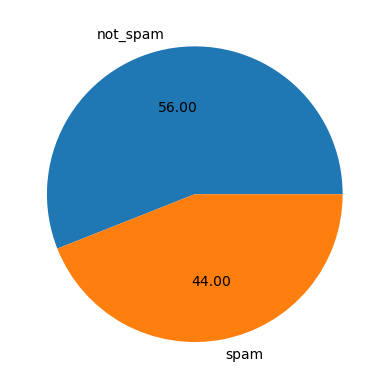

In [105]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['not_spam','spam'],autopct="%0.2f")
plt.show()

In [106]:
import nltk

In [107]:
# !pip install nltk

In [110]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashwanth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
df['num_characters'] = df['message'].apply(len)

In [113]:
df.head()

,message,label,num_characters
0,Hi! Want to get rich quick? Click this link ht...,1,67
1,Hey there..just checking in to see how you're ...,0,70
2,Free concert tickets for this weekend! Click h...,1,129
3,Did you know you can get a free credit report ...,0,104
4,URGENT! Your account has been suspended! Click...,1,143


In [114]:
# num of words
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [115]:
df.head()

,message,label,num_characters,num_words
0,Hi! Want to get rich quick? Click this link ht...,1,67,14
1,Hey there..just checking in to see how you're ...,0,70,18
2,Free concert tickets for this weekend! Click h...,1,129,15
3,Did you know you can get a free credit report ...,0,104,22
4,URGENT! Your account has been suspended! Click...,1,143,15


In [116]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [117]:
df.head()

,message,label,num_characters,num_words,num_sentences
0,Hi! Want to get rich quick? Click this link ht...,1,67,14,3
1,Hey there..just checking in to see how you're ...,0,70,18,2
2,Free concert tickets for this weekend! Click h...,1,129,15,2
3,Did you know you can get a free credit report ...,0,104,22,2
4,URGENT! Your account has been suspended! Click...,1,143,15,3


In [118]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,500.000000,500.000000,500.000000
mean,86.020000,14.782000,1.972000
std,40.667718,5.101227,0.572601
min,35.000000,8.000000,1.000000
25%,56.000000,11.750000,2.000000
50%,70.500000,13.000000,2.000000
75%,109.000000,17.000000,2.000000
max,209.000000,37.000000,3.000000


In [120]:
#not spam
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,280.000000,280.000000,280.000000
mean,79.353571,15.014286,1.925000
std,37.868666,5.441755,0.602935
min,35.000000,8.000000,1.000000
25%,55.750000,11.000000,2.000000
50%,68.000000,13.000000,2.000000
75%,85.000000,17.000000,2.000000
max,209.000000,37.000000,3.000000


In [122]:
#spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,220.000000,220.000000,220.000000
mean,94.504545,14.486364,2.031818
std,42.571508,4.627178,0.526803
min,38.000000,9.000000,1.000000
25%,61.000000,12.000000,2.000000
50%,82.000000,14.000000,2.000000
75%,123.500000,16.000000,2.000000
max,192.000000,28.000000,3.000000


In [123]:
import seaborn as sns

C:\Users\yashwanth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashwanth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

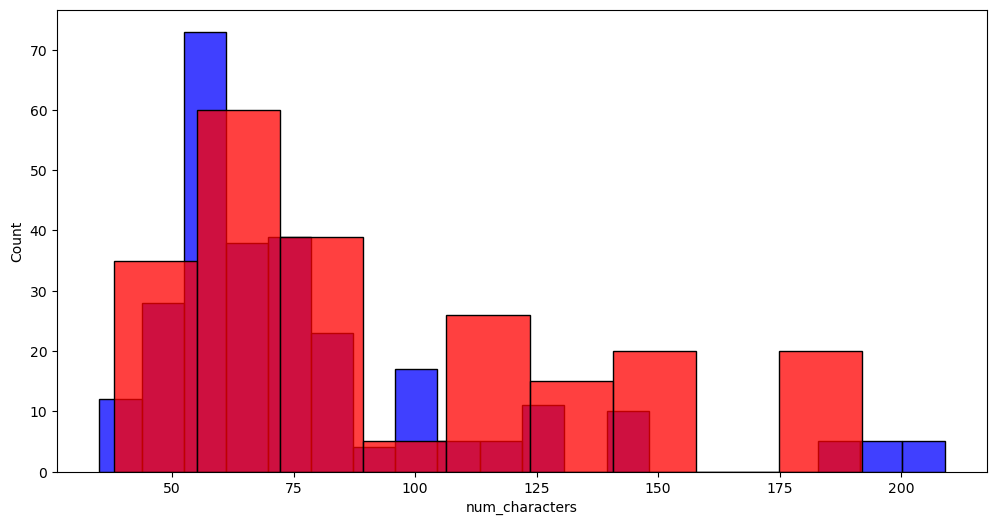

In [129]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'],color='blue')
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

C:\Users\yashwanth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashwanth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashwanth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


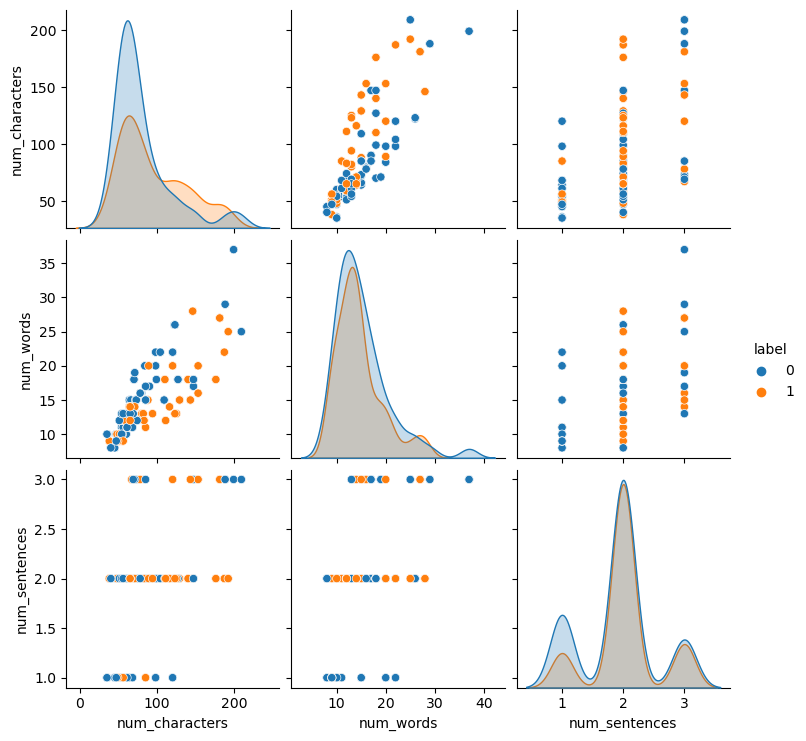

In [130]:
sns.pairplot(df,hue='label')

In [138]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('driving')

'drive'

In [139]:
df['transformed_text'] = df['message'].apply(ps.stem)

In [140]:
df.head()

,message,label,num_characters,num_words,num_sentences,transformed_text
0,Hi! Want to get rich quick? Click this link ht...,1,67,14,3,hi! want to get rich quick? click this link ht...
1,Hey there..just checking in to see how you're ...,0,70,18,2,hey there..just checking in to see how you're ...
2,Free concert tickets for this weekend! Click h...,1,129,15,2,free concert tickets for this weekend! click h...
3,Did you know you can get a free credit report ...,0,104,22,2,did you know you can get a free credit report ...
4,URGENT! Your account has been suspended! Click...,1,143,15,3,urgent! your account has been suspended! click...


In [142]:
# !pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 744.7 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 737.3 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 737.3 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 737.3 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 758.5 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 758.5 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/300.2 kB 628.5 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 632.9 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 618.2 kB/s eta 0:00:00


In [143]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

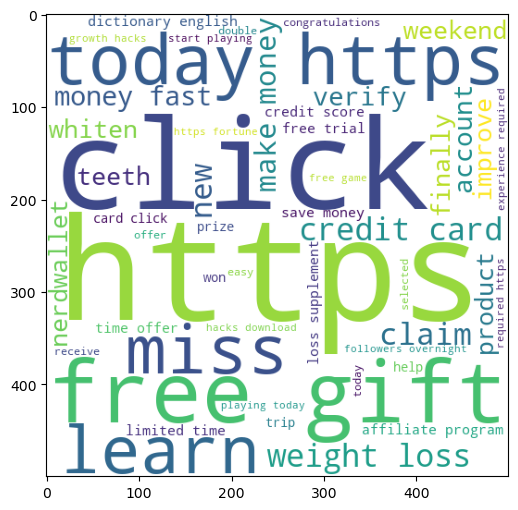

In [149]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [150]:
df.head()

,message,label,num_characters,num_words,num_sentences,transformed_text
0,Hi! Want to get rich quick? Click this link ht...,1,67,14,3,hi! want to get rich quick? click this link ht...
1,Hey there..just checking in to see how you're ...,0,70,18,2,hey there..just checking in to see how you're ...
2,Free concert tickets for this weekend! Click h...,1,129,15,2,free concert tickets for this weekend! click h...
3,Did you know you can get a free credit report ...,0,104,22,2,did you know you can get a free credit report ...
4,URGENT! Your account has been suspended! Click...,1,143,15,3,urgent! your account has been suspended! click...


## 2. Model Building

In [158]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [159]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [161]:
X.shape

(500, 511)

In [163]:
y = df['label'].values

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [166]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [167]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [168]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.95
[[54  0]
 [ 5 41]]
1.0


In [169]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.95
[[54  0]
 [ 5 41]]
1.0


In [170]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.96
[[54  0]
 [ 4 42]]
1.0


In [175]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))